<a href="https://colab.research.google.com/github/valerie-ma/valerie-ma/blob/master/intro_datasets_healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Datasets**
### *Michaela Buchanan - Mark III Systems*

---

###Introduction

Finding a good dataset to train a ML/DL model off of often condidered one of the hardest aspects of starting such a project. In this notebook, I will be showing you 3 different methods of importing and interacting with a dataset once you find one you want to try. First we will be using Keras, then TensorFlow, and finally we will use one we just found on the web. Finally, we will briefly go through a few Pandas functions which are useful for quickly cleaning up a dataset for use in training.

---

###Keras

Keras comes with several commonly used datasets which can easily be imported if you are building your model in Keras. A list of datasets available in Keras can be found [here](https://keras.io/api/datasets/). If you are just looking for a dataset to start learning how to build models, I would highly recommend going this route as these datasets are well known and documented and are also going to be clean and easy to work with.

We need to start by importing Keras using the following commands. Notice that Keras is now part of TensorFlow so we import it from TF.

In [ ]:
from tensorflow import keras
from keras.datasets import imdb

For this example we are going to import the IMDB movie review dataset. This dataset is commonly used for sentiment classification which means you are trying to train the model to classify the reviews as positive or negative. The code below shows how to import our dataset from Keras.

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


This loads the dataset into X and Y training and testing groups. Let's take a look at what our X and Y values look like.

In [ ]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


This dataset is already preprocessed which is why we get a sequence of numbers for our X instead of a written review. The numbers show the frequency of the word they represent, ie 14 is the 14th most frequent word. To find information about your dataset like this visit the Keras documentation on it. For this dataset the documentation is located [here](https://keras.io/api/datasets/imdb/). Let's use the function built into Keras to decode our x sample back to words.

In [ ]:
# https://stackoverflow.com/questions/42821330/restore-original-text-from-keras-s-imdb-dataset

INDEX_FROM = 3

word_to_id = imdb.get_word_index()

word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

inverted_word_index = dict((i, word) for (word, i) in word_to_id.items())
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
print(decoded_sequence)

1641221/1641221 [==============================] - 0s 0us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big pr

This is an example of the challenges of data science. If you go directly to the documentation and try the steps they describe, you end up with jibberish. I had to look online to find a solution which ended up being in this stack overflow link I put on top of the code. This goes to show that even with the more straightforward dataset solutions you shouldn't be surprised if there are some obstacles to overcome in working with it.

---

###Tensorflow

While the datasets provided by Keras are a great resource for getting started, they are limited in actual problem-solving value. Tensorflow provides a more extensive selection of dataset that you can import in a similar manner to importing datasets from Keras. See this [link](https://www.tensorflow.org/datasets/catalog/overview#all_datasets) to view all the datasets provided by Tensorflow. We will be importing the `oxford_iiit_pet` image dataset which includes 37 different pet categories. I followed the TensorFlow documentation located [here](https://www.tensorflow.org/datasets/overview) for this section.




In [ ]:
import tensorflow_datasets as tfds

ds = tfds.load('oxford_iiit_pet', split='train', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incomplete04KH8J/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incomplete04KH8J/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


Now let's grab one example from our dataset to inspect.

['file_name', 'image', 'label', 'segmentation_mask', 'species']
tf.Tensor(b'miniature_pinscher_102.jpg', shape=(), dtype=string)


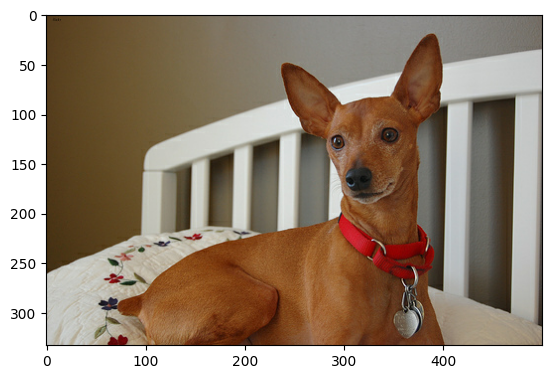

In [ ]:
import matplotlib.pyplot as plt

ds = ds.take(1)

for example in ds:
  print(list(example.keys()))
  image = example["image"]
  label = example["file_name"]
  print(label)
  plt.imshow(image)

---

###Kaggle

For this section I'm not going to do a live demo but instead leave you with the link to the documentation describing how to set it up [here](https://www.kaggle.com/docs/api). The API is pretty simple to set up and use in your command prompt and allows you to easily download any Kaggle dataset to your computer. Kaggle is a great resource for dataset as you get a much greater variety of choices. However, be warned that all of them are uploaded by users like you so a significant amount of cleaning and preprocessing may be required. If you have problems with the Kaggle API feel free to reach out to me and I can help or make a seperate video showing how to do it.

---

###From Source

The final and most traditional method of finding a dataset is just doing a Google search. Many datasets are hosted by the organization that created them and is available via direct download. As an example we are going to be looking at the [Street View House Numbers (SVHN)](http://ufldl.stanford.edu/housenumbers//) dataset which is a different, more challenging take on the classic MNIST dataset. It contains Google Street View images of house numbers and the goal is to be able to find and read the house numbers in the images.

If you visit the website linked for this dataset, you will see a Downloads section. Let's go ahead and download the test dataset for this example as it should be a bit smaller than the training subset.

In [ ]:
!wget http://ufldl.stanford.edu/housenumbers/test.tar.gz

--2023-05-17 20:04:42--  http://ufldl.stanford.edu/housenumbers/test.tar.gz
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276555967 (264M) [application/x-gzip]
Saving to: ‘test.tar.gz’

test.tar.gz         100%[===================>] 263.74M  22.3MB/s    in 15s     

2023-05-17 20:04:57 (17.4 MB/s) - ‘test.tar.gz’ saved [276555967/276555967]



The next step is to unpack the images since this download comes compressed as a `.tar.gz` file.

In [ ]:
!tar xvzf test.tar.gz

Streaming output truncated to the last 5000 lines.
test/2574.png
test/2554.png
test/2550.png
test/2549.png
test/2535.png
test/2528.png
test/2519.png
test/2516.png
test/2510.png
test/2504.png
test/2494.png
test/2491.png
test/2485.png
test/2477.png
test/2470.png
test/2432.png
test/2390.png
test/2385.png
test/2351.png
test/2339.png
test/2320.png
test/2316.png
test/2315.png
test/2296.png
test/2279.png
test/2271.png
test/2258.png
test/2249.png
test/2245.png
test/2229.png
test/2209.png
test/2197.png
test/2192.png
test/2190.png
test/2186.png
test/2178.png
test/2175.png
test/2157.png
test/2154.png
test/2150.png
test/2148.png
test/2128.png
test/2126.png
test/2116.png
test/2103.png
test/2077.png
test/2061.png
test/2047.png
test/2015.png
test/1945.png
test/1939.png
test/1903.png
test/1869.png
test/1859.png
test/1847.png
test/1836.png
test/1826.png
test/1817.png
test/1804.png
test/1796.png
test/1791.png
test/1783.png
test/1773.png
test/1764.png
test/1744.png
test/1718.png
test/1680.png
test/1678.p

Now we can look at the side bar and find our new test directory in the

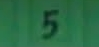

In [ ]:
from IPython.display import Image
Image('test/1.png')

In [ ]:
!pip install mat73
import mat73

data_dict = mat73.loadmat('test/digitStruct.mat')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Above we are pulling the MatLab formatted information about our images from the digitStruct.mat file and printed them out. We can find the 'label' entries which correspond to the image we pull up in this numpy array. This will take a few minutes.

In [ ]:
print(data_dict)

{'digitStruct': {'bbox': [{'height': array(30.), 'label': array(5.), 'left': array(43.), 'top': array(7.), 'width': array(19.)}, {'height': [array(23.), array(23.), array(23.)], 'label': [array(2.), array(1.), array(10.)], 'left': [array(99.), array(114.), array(121.)], 'top': [array(5.), array(8.), array(6.)], 'width': [array(14.), array(8.), array(12.)]}, {'height': array(16.), 'label': array(6.), 'left': array(61.), 'top': array(6.), 'width': array(11.)}, {'height': array(17.), 'label': array(1.), 'left': array(32.), 'top': array(6.), 'width': array(14.)}, {'height': array(28.), 'label': array(9.), 'left': array(97.), 'top': array(28.), 'width': array(19.)}, {'height': array(23.), 'label': array(1.), 'left': array(40.), 'top': array(11.), 'width': array(7.)}, {'height': [array(21.), array(21.), array(21.)], 'label': [array(1.), array(8.), array(3.)], 'left': [array(44.), array(51.), array(62.)], 'top': [array(7.), array(6.), array(6.)], 'width': [array(9.), array(11.), array(10.)]},

---

###Case Study

Now we are going to look at a practical example of manipulating datasets for use in ML/DL training. For this case study, we will be looking at two datasets related to trying to predict heart disease. This part of the workshop is essentially going to boil down to a crash course in Pandas which is a popular Python library for data analysis and manipulation. While I am going to be showing you some of the things you can do with Pandas, I would highly suggest you refer to the Pandas docs and tutorials (https://pandas.pydata.org/) before taking on your own project like this.

The first dataset we will be using takes data from patients who have been admitted to a clinic due to a heart failure. The link to it on Kaggle is here (https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data).

The second dataset is much larger than the first and consists of demographic, health, and biological information about various individuals as well as whether that person suffers from a cardiovascular disease. The goal for the creation of this dataset was to determine if one can predict risk factors for heart disease. The link for this dataset on Kaggle is here (https://www.kaggle.com/datasets/thedevastator/exploring-risk-factors-for-cardiovascular-diseas?resource=download&sort=votes)

Notice for both dataset we have information about the subjects' ages and genders. The goal of this case study will be to take average values from our very large dataset for the individuals' ages and sexes and apply them to the clinical datasets. We will do this for the alcohol use and cardio columns as we don't have this information for our smaller clinical dataset. In other works we want to know what the average alcohol and cardio values are for each age and sex combination from our large population dataset and then apply those to the corresponding individuals in our clinical dataset based on their age and sex.  

Keep in mind that we are doing this mainly as a toy exercise to practice Pandas. In reality there would be a lot to consider before making the assumption that this stategy is valid and worth trying. You would want to think about if these datasets come from the same population and if taking averages in this manner is truly representative of the alcohol and cardio habits of the clinic individuals. For example if our large population dataset came from individuals in India and our small clinic dataset came from hospital in Wisconsin one should question if the information about alcohol use and cardio from our population dataset is going to tell us anything useful.

Let's start by downloading and taking a look at both of the datasets we are going to be using.

In [ ]:
!git clone https://github.com/michaelabuchanan/health_datasets_session.git

Cloning into 'health_datasets_session'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), 911.33 KiB | 3.06 MiB/s, done.


Below you can see the dataset of individuals that experienced heart failure at a clinic which I will be referring to as the clinic dataset. It is only 299 rows long.

In [ ]:
import pandas as pd

clinic_dataset = pd.read_csv('health_datasets_session/heart_failure_clinical_records_dataset.csv')
clinic_dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Let's do a quick check for null or empty values in our dataset. Empty values will usually be represented by NaN in Python (not a number) and will cause an error if we try to train with this data.

In [ ]:
print(clinic_dataset.isnull().values.any())

False


We don't have any empty values in this case but if we did we would have to either remove the rows that contain empty values or fill the empty spots with something like a placeholder or an average values from the column it came from.

Now let's load in our second dataset. This is a much larger dataset than our first one with 70,000 rows which I will be referring to as our population dataset. We will be taking our averages from the `alco` and `cardio` columns of this dataset to apply to our smaller heart clinic patient dataset. The `index` and `id` columns are dropped out just to clean the dataset up a little bit.

In [ ]:
pop_dataset = pd.read_csv('health_datasets_session/heart_data.csv')
pop_dataset = pop_dataset.drop(columns=['index', 'id'])
print(len(pop_dataset))
pop_dataset

70000


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Notice that the age in the population dataset lists age in days not years which does not line up with the year format in the clinic dataset. Luckily this is easy to change as seen below. We get the age column from our population dataset, divide all the values by 365, round them, and then store them in a new Series.

In [ ]:
age_col = pop_dataset["age"]
year_col = round(age_col / 365)
year_col.rename("year_age", inplace=True)
year_col

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: year_age, Length: 70000, dtype: float64

We then add the year-format age Series we made back onto our clinic dataset.

In [ ]:
pop_dataset = pd.concat([pop_dataset, year_col], axis=1)
pop_dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year_age
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.0


We also have a discrepancy in the way sex is recorded in both datasets. The clinic dataset uses 0 or 1 and the population dataset uses 1 and 2 to indicate male and female. Let's standardize using 0 for female and 1 for male. To do this we need to change the population dataset to use this format in the gender column. Unfortunately for us this dataset does not specify if 1 is male or female so we are going to assume that 1 is male and 2 is female. Obviously not having this information would be a huge problem if we looking to actually use this dataset for training but we are going to go ahead with this assumption for the sake of example.


In [ ]:
pop_dataset['gender'] = pop_dataset['gender'].replace(2, 0)
pop_dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year_age
0,18393,0,168,62.0,110,80,1,1,0,0,1,0,50.0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,17623,0,169,82.0,150,100,1,1,0,0,1,1,48.0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,0,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,19066,0,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.0


Now it's time to start putting together our averages for the alcohol and cardio columns based on age and gender. Looking at the min and maxes of ages in our dataset we can already tell that we are going to have individuals in the clinic dataset that are outside of the age range of individuals in our population dataset. We are going to use a filler values which will be the average for that column over the entire population for these cases.

In [ ]:
print("Clinic dataset ranges:")
print(clinic_dataset['age'].min())
print(clinic_dataset['age'].max())

print("\nPopulation dataset ranges:")
print(pop_dataset['year_age'].min())
print(pop_dataset['year_age'].max())

Clinic dataset ranges:
40.0
95.0

Population dataset ranges:
30.0
65.0


Getting the average over a column is pretty simple in Pandas using the `mean()` function. Below you can see the averages for our alcohol and cardio columns in our population dataset. We will use these values later to fill in for individuals in our clinic dataset whose ages are outside those in our population dataset. The data for these two columns is binary (0 or 1) with 0 meaning they don't use alcohol or are not physically active and 1 meaning they do use alcohol or are physically active depending on which category we are talking about. Therefore our averages make sense as they are between 0 and 1.

In [ ]:
average_alc = pop_dataset["alco"].mean()
print("Alcohol average: " + str(average_alc))

average_card = pop_dataset["cardio"].mean()
print("Cardio average: " + str(average_card))

Alcohol average: 0.053771428571428574
Cardio average: 0.4997


Now let's find the combinations of age and sex present from our smaller clinic dataset. This will tell us what combinations we need to find averages for in our population dataset. The code below accomplishes this. You should see that we are left with 79 different combinations that we need to find averages for from our population dataset.

In [ ]:
combos = pd.DataFrame()
combos = pd.concat([combos, clinic_dataset[['age', 'sex']].drop_duplicates()])
combos

,age,sex
0,75.0,1
1,55.0,1
2,65.0,1
3,50.0,1
4,65.0,0
...,...,...
263,68.0,0
267,56.0,1
271,51.0,0
272,67.0,0


Now we need to start developing a loop to go through each of our combinations and calculate the alcohol and cardio values for that age/sex group. Below I show an example which runs through the first 8 combos to demonstrate how this works. The print statements show the age, sex, number of rows found, and average for each combo we go though. Notice how some of the groups return 0 rows and give `nan` as the average. This is because we have some combinations from our clinic dataset that are outside the age range present in our population dataset.

This loop works by grabbing the rows one by one and then selecting the rows from our population dataset that match the age and sex in our current `row`. We then take the mean from all the found rows and print it out.

In [ ]:
combos_short = combos.head(8)

for row in combos_short.itertuples():
  age = row.age
  sex = row.sex
  print(age)
  print(sex)
  selected_rows = pop_dataset.loc[(pop_dataset['year_age'] == age) & (pop_dataset['gender'] == sex)]
  print(len(selected_rows.index))
  avg_alc = selected_rows['alco'].mean()
  print(str(avg_alc) + "\n")

75.0
1
0
nan

55.0
1
1005
0.027860696517412936

65.0
1
209
0.028708133971291867

50.0
1
3537
0.029968900197907832

65.0
0
143
0.06993006993006994

90.0
1
0
nan

60.0
1
3765
0.021248339973439574

80.0
1
0
nan



Now that you've seen how it works let's do this operation over all the combinations. While I removed the print statements this loop works the same as the one above. It just stores the mean values we find in the lists declare at the beginning rather than printing them out.

In [ ]:
avg_alc_list = []
avg_cardio_list = []

for row in combos.itertuples():
  age = row.age
  sex = row.sex
  selected_rows = pop_dataset.loc[(pop_dataset['year_age'] == age) & (pop_dataset['gender'] == sex)]
  alc = selected_rows['alco'].mean()
  card = selected_rows['cardio'].mean()
  avg_alc_list.append(alc)
  avg_cardio_list.append(card)

Here we are going to print out the lists we made and their length to make sure it looks like what we are expecting. The length is a good sanity check as it should be the exact same as the number of combinations we went through from our `combos` DataFrame.

In [ ]:
print(avg_alc_list)
print(avg_cardio_list)
print(len(avg_alc_list))
print(len(avg_cardio_list))

[nan, 0.027860696517412936, 0.028708133971291867, 0.029968900197907832, 0.06993006993006994, nan, 0.021248339973439574, nan, 0.021105951878429716, 0.02575107296137339, 0.11886304909560723, nan, nan, nan, 0.10484511517077046, nan, 0.02845100105374078, nan, nan, nan, 0.026472177201512695, nan, nan, 0.11965317919075144, nan, nan, 0.0988235294117647, nan, 0.026058631921824105, 0.11949685534591195, 0.13537117903930132, nan, 0.022321428571428572, 0.13058419243986255, 0.1262135922330097, 0.024844720496894408, 0.03136762860727729, 0.0973630831643002, nan, nan, 0.09761904761904762, 0.028669724770642203, 0.020512820512820513, 0.1035, 0.020061728395061727, 0.04076086956521739, nan, nan, nan, nan, 0.0888030888030888, 0.12414965986394558, 0.016029593094944512, nan, 0.08798972382787412, 0.09024390243902439, 0.023977433004231313, 0.019062748212867357, 0.11547212741751992, 0.02459893048128342, nan, nan, 0.030162412993039442, nan, nan, 0.11065573770491803, 0.08559201141226819, nan, nan, nan, 0.09304652

Now let's add the lists of averages we created to our `combos` DataFrame.

In [ ]:
combos['alc'] = avg_alc_list
combos['cardio'] = avg_cardio_list
combos

,age,sex,alc,cardio
0,75.0,1,NaN,NaN
1,55.0,1,0.027861,0.537313
2,65.0,1,0.028708,0.703349
3,50.0,1,0.029969,0.378569
4,65.0,0,0.069930,0.664336
...,...,...,...,...
263,68.0,0,NaN,NaN
267,56.0,1,0.026303,0.543108
271,51.0,0,0.128806,0.494145
272,67.0,0,NaN,NaN


Notice we have a lot of `NaN` values in our DataFrame. These are the age and sex combinations from our clinic dataset that did not have a corresponding average in the population dataset. Let's replace these with the overall averages for both of these columns that we found a while back. We use the `fillna()` function to accomplish this.

In [ ]:
combos['alc'] = combos['alc'].fillna(average_alc)
combos['cardio'] = combos['cardio'].fillna(average_card)
combos

,age,sex,alc,cardio
0,75.0,1,0.053771,0.499700
1,55.0,1,0.027861,0.537313
2,65.0,1,0.028708,0.703349
3,50.0,1,0.029969,0.378569
4,65.0,0,0.069930,0.664336
...,...,...,...,...
263,68.0,0,0.053771,0.499700
267,56.0,1,0.026303,0.543108
271,51.0,0,0.128806,0.494145
272,67.0,0,0.053771,0.499700


The last step in this process is going to be to go though each row in our clinic dataset, look up the right averages in our `combos` DataFrame for that individual, and add them to the clinic dataset. We are once again going to create two lists and store the right averages in those lists after we look them up for each row. We will append these lists to the clinic dataset at the end.

In [ ]:
clinic_alc_list = []
clinic_cardio_list = []

for row in clinic_dataset.itertuples():
  combo_row = combos.loc[(combos['age'] == row.age) & (combos['sex'] == row.sex)].values.tolist()
  clinic_alc_list.append(combo_row[0][2])
  clinic_cardio_list.append(combo_row[0][3])

Below you can see the resulting lists. Once again we check the lengths to make sure they match up with the length of the clinic dataset.

In [ ]:
print(clinic_alc_list)
print(clinic_cardio_list)

print(len(clinic_alc_list))
print(len(clinic_cardio_list))

[0.053771428571428574, 0.027860696517412936, 0.028708133971291867, 0.029968900197907832, 0.06993006993006994, 0.053771428571428574, 0.053771428571428574, 0.021248339973439574, 0.06993006993006994, 0.053771428571428574, 0.053771428571428574, 0.021105951878429716, 0.02575107296137339, 0.029968900197907832, 0.11886304909560723, 0.053771428571428574, 0.053771428571428574, 0.02575107296137339, 0.053771428571428574, 0.10484511517077046, 0.06993006993006994, 0.06993006993006994, 0.053771428571428574, 0.02845100105374078, 0.053771428571428574, 0.053771428571428574, 0.053771428571428574, 0.053771428571428574, 0.026472177201512695, 0.053771428571428574, 0.053771428571428574, 0.053771428571428574, 0.11965317919075144, 0.11965317919075144, 0.028708133971291867, 0.053771428571428574, 0.053771428571428574, 0.053771428571428574, 0.021248339973439574, 0.0988235294117647, 0.053771428571428574, 0.11965317919075144, 0.053771428571428574, 0.053771428571428574, 0.0988235294117647, 0.029968900197907832, 0.0

Now we just append the lists as new columns onto the clinic dataset.

In [ ]:
clinic_dataset['alc'] = clinic_alc_list
clinic_dataset['cardio'] = clinic_cardio_list
final_dataset = clinic_dataset

Below is the final result of this operation. Hopefully this gave you an look into the capabilites of Pandas and the kinds of things you can achieve through dataset manipulation.

In [ ]:
final_dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,alc,cardio
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0.053771,0.499700
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0.027861,0.537313
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0.028708,0.703349
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0.029969,0.378569
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0.069930,0.664336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0.021106,0.697341
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0.097363,0.557809
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,0.130584,0.388316
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0.025751,0.377682


---

###Useful Resources

Here are some links to some other useful websites and search engines to visit when looking for a dataset. A lot of these came from a great blog post linked [here](https://imerit.net/blog/the-60-best-free-datasets-for-machine-learning-all-pbm/) which I would recommend giving a read.



*   UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php
*   Google Dataset Search: https://datasetsearch.research.google.com/
*   AWS Open Data Registry: https://registry.opendata.aws/
*   Wikipedia ML Datasets: https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research

